In [1]:
from jitcdde import jitcdde, y, t
from parameters_expanded import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

Define system

In [2]:
###############################################################################
# CORE
###############################################################################

# fuel nodes
T_c_f1 = W_f/(m_f_c/2)*((y(7,t-tau_hx_c_f)+y(12,t-tau_hx_c_f))/2-y(0)) + (k_f1*P*y(46)/(mcp_f_c/2)) + (hA_ft_c*(y(2)-y(0))/mcp_f_c)           # T_cf1: y(0)
T_c_f2 = W_f/(m_f_c/2)*(y(0)-y(1)) + (k_f2*P*y(46)/(mcp_f_c/2)) + (hA_ft_c*(y(2)-y(1))/(mcp_f_c))                        # T_cf2: y(1)

# tubes
T_c_t1=(hA_ft_c/mcp_t_c)*((y(0)-y(2))+(y(1)-y(2)))+(hA_tc_c/mcp_t_c)*((y(3)-y(2))+(y(4)-y(2)))                   # T_c_t1: y(2)

# coolant 
T_c_c1 = W_c/(m_c_c/2)*((y(27,t-tau_hx_c_f)+y(32,t-tau_hx_c_f))/2-y(3))+(hA_tc_c*(y(2)-y(3))/mcp_c_c)+((hA_mc_c)/mcp_c_c)*((y(5)-y(3))) # T_c_c1: y(3)
T_c_c2 = W_c/(m_c_c/2)*(y(3)-y(4)) + (hA_tc_c*(y(2)-y(4))/mcp_c_c)+((hA_mc_c)/mcp_c_c)*((y(5)-y(4)))             # T_c_c1: y(4)  

# moderator 
T_c_m = (hA_mc_c/mcp_m_c)*((y(3)-y(5))+(y(4)-y(5)))+(k_m*P*y(46)/mcp_m_c)                                        #T_c_b: y(5)

In [3]:
###############################################################################
# Fuel Heat Disposal System
###############################################################################

# FUEL-HELIUM HX 1
# fuel nodes
T_hxfh1_f1 = W_f/m_f_hx*(y(1,t-tau_c_hx_f)-y(6)) + ((hA_ft_hx)*(y(8)-y(6))/(mcp_f_hx))                                    # y(6)
T_hxfh1_f2 = W_f/m_f_hx*(y(6)-y(7)) + ((hA_ft_hx)*(y(8)-y(7))/(mcp_f_hx))                                                 # y(7)

# tubes
T_hxfh1_t1 = (hA_ft_hx/mcp_t_hx)*((y(6)-y(8))+(y(7)-y(8)))+(hA_ht_hx/mcp_t_hx)*((y(9)-y(8))+(y(10)-y(8)))                 # y(8)

# helium
T_hxfh1_h1 = W_h_fh/(m_h_hxfh/2)*(y(22,t-tau_h)-y(9)) + (hA_ht_hx*(y(8)-y(9))/mcp_h_hxfh)                                   # y(9) 
T_hxfh1_h2 = W_h_fh/(m_h_hxfh/2)*(y(9)-y(10)) + (hA_ht_hx*(y(8)-y(10))/mcp_h_hxfh)                                          # y(10) 


# FUEL-HELIUM HX 2
# fuel nodes
T_hxfh2_f1 = W_f/m_f_hx*(y(1,t-tau_c_hx_f)-y(11)) + ((hA_ft_hx)*(y(13)-y(11))/(mcp_f_hx))                                 # y(11)
T_hxfh2_f2 = W_f/m_f_hx*(y(11)-y(12)) + ((hA_ft_hx)*(y(13)-y(12))/(mcp_f_hx))                                             # y(12)

# tubes
T_hxfh2_t1 = (hA_ft_hx/mcp_t_hx)*((y(11)-y(13))+(y(12)-y(13)))+(hA_ht_hx/mcp_t_hx)*((y(14)-y(13))+(y(15)-y(13)))          # y(13)

# helium
T_hxfh2_h1 = W_h_fh/(m_h_hxfh/2)*(y(17)-y(14)) + (hA_ht_hx*(y(13)-y(14))/mcp_h_hxfh)                              # y(14) 
T_hxfh2_h2 = W_h_fh/(m_h_hxfh/2)*(y(14)-y(15)) + (hA_ht_hx*(y(13)-y(15))/mcp_h_hxfh)                                      # y(15) 


# HELIUM-WATER HX1 (FUEL LOOP)
# helium
T_hxhwf1_h1 = W_h_fh/(m_h_hxhw/2)*(y(10)-y(16)) + (hA_ht_hxhw*(y(18)-y(16))/mcp_h_hxhw)                           # y(16)
T_hxhwf1_h2 = W_h_fh/(m_h_hxhw/2)*(y(16)-y(17)) + (hA_ht_hxhw*(y(18)-y(17))/mcp_h_hxhw)                                   # y(17)

# tubes
T_hxhwf1_t1 = (hA_ht_hxhw/mcp_t_hxhw)*((y(16)-y(18))+(y(17)-y(18)))+(hA_tw_hxhw/mcp_t_hxhw)*((y(19)-y(18))+(y(20)-y(18))) # y(18)

# water
T_hxhwf1_w1 = W_hhwf_w/(m_w)*(T0_hhwf_w1-y(19)) + (hA_tw_hxhw*(y(18)-y(19))/mcp_w)                                      # y(19) 
T_hxhwf1_w2 = W_hhwf_w/(m_w)*(y(19)-y(20)) + (hA_tw_hxhw*(y(18)-y(20))/mcp_w)                                           # y(20)

# HELIUM-WATER HX2 (FUEL LOOP)
# helium
T_hxhwf2_h1 = W_h_fh/(m_h_hxhw/2)*(y(15)-y(21)) + (hA_ht_hxhw*(y(23)-y(21))/mcp_h_hxhw)                           # y(21)
T_hxhwf2_h2 = W_h_fh/(m_h_hxhw/2)*(y(21)-y(22)) + (hA_ht_hxhw*(y(23)-y(22))/mcp_h_hxhw)                                   # y(22)

# tubes
T_hxhwf2_t1 = (hA_ht_hxhw/mcp_t_hxhw)*((y(21)-y(23))+(y(22)-y(23)))+(hA_tw_hxhw/mcp_t_hxhw)*((y(24)-y(23))+(y(25)-y(23))) # y(23)

# water
T_hxhwf2_w1 = W_hhwf_w/(m_w)*(T0_hhwf_w1-y(24)) + (hA_tw_hxhw*k_1*(y(23)-y(24))/mcp_w)                                  # y(24) 
T_hxhwf2_w2 = W_hhwf_w/(m_w)*(y(24)-y(25)) + (hA_tw_hxhw*k_2*(y(23)-y(25))/mcp_w)                                       # y(25)


In [4]:
###############################################################################
# Coolant Heat Disposal System --> 
###############################################################################

# COOLANT-HELIUM HX1
# fuel nodes
T_hxch1_c1 = W_c/m_c_hx*(y(4,t-tau_c_hx_f)-y(26)) + (hA_ct_hx*(y(28)-y(26))/mcp_h_c)                                 # y(26)
T_hxch1_c2 = W_c/m_c_hx*(y(26)-y(27)) + (hA_ct_hx*(y(28)-y(27))/mcp_h_c)                                             # y(27)

# tubes
T_hxch1_t1 = (hA_ct_hx/m_t_hxch)*((y(26)-y(28))+(y(27)-y(28)))+(hA_th_hxch/mcp_t_hxch)*((y(29)-y(28))+(y(30)-y(28))) # y(28)

# helium 
T_hxch1_h1 = W_h_ch/m_h_hxch*(y(42,t-tau_h)-y(29)) + (hA_th_hxch*(y(28)-y(29))/mcp_h_hxch)                           # y(29) 
T_hxch1_h2 = W_h_ch/m_h_hxch*(y(29)-y(30)) + (hA_th_hxch*(y(28)-y(30))/mcp_h_hxch)                                   # y(30) 

# COOLANT-HELIUM HX2
# fuel nodes
T_hxch2_c1 = W_c/m_c_hx*(y(4,t-tau_c_hx_f)-y(31)) + (hA_ct_hx*(y(33)-y(31))/mcp_h_c)                                 # y(31)
T_hxch2_c2 = W_c/m_c_hx*(y(31)-y(32)) + (hA_ct_hx*k_2*(y(33)-y(32))/mcp_h_c)                                         # y(32)

# tubes
T_hxch2_t1 = (hA_ct_hx/m_t_hxch)*((y(31)-y(33))+(y(32)-y(33)))+(hA_th_hxch/mcp_t_hxch)*((y(34)-y(33))+(y(35)-y(33))) # y(33)

# helium
T_hxch2_h1 = W_h_ch/m_h_hxch*(y(37)-y(34)) + (hA_th_hxch*(y(33)-y(34))/mcp_h_hxch)                           # y(34) 
T_hxch2_h2 = W_h_ch/m_h_hxch*(y(34)-y(35)) + (hA_th_hxch*(y(33)-y(35))/mcp_h_hxch)                                   # y(35) 


# HELIUM-WATER HX1 (COOLANT LOOP)
# helium
T_hxhwc1_h1 = W_h_ch/(m_h_hxhwc/2)*(y(30)-y(36)) + (hA_ht_hxhwc*(y(38)-y(36))/mcp_h_hxhwc)                           # y(36)
T_hxhwc1_h2 = W_h_ch/(m_h_hxhwc/2)*(y(36)-y(37)) + (hA_ht_hxhwc*(y(38)-y(37))/mcp_h_hxhwc)                                   # y(37)

# tubes
T_hxhwc1_t1 = (hA_ht_hxhwc/mcp_t_hxhwc)*((y(36)-y(38))+(y(37)-y(38)))+(hA_tw_hxhwc/mcp_t_hxhwc)*((y(39)-y(38))+(y(40)-y(38))) # y(38)

# water
T_hxhwc1_w1 = W_hhwf_w/(m_w)*(T0_hhwf_w1-y(39)) + (hA_tw_hxhwc*(y(38)-y(39))/mcp_w_hxhwc)                                      # y(39) 
T_hxhwc1_w2 = W_hhwf_w/(m_w)*(y(39)-y(40)) + (hA_tw_hxhwc*(y(38)-y(40))/mcp_w_hxhwc)                                           # y(40)

# HELIUM-WATER HX2 (COOLANT LOOP)
# helium
T_hxhwc2_h1 = W_h_ch/(m_h_hxhwc/2)*(y(35)-y(41)) + (hA_ht_hxhwc*(y(43)-y(41))/mcp_h_hxhwc)                           # y(41)
T_hxhwc2_h2 = W_h_ch/(m_h_hxhwc/2)*(y(41)-y(42)) + (hA_ht_hxhwc*(y(43)-y(42))/mcp_h_hxhwc)                                   # y(42)

# tubes
T_hxhwc2_t1 = (hA_ht_hxhwc/mcp_t_hxhwc)*((y(41)-y(43))+(y(42)-y(43)))+(hA_tw_hxhwc/mcp_t_hxhwc)*((y(44)-y(43))+(y(45)-y(43))) # y(43)

# water
T_hxhwc2_w1 = W_hhwf_w/(m_w)*(T0_hhwf_w1-y(44)) + (hA_tw_hxhwc*k_1*(y(43)-y(44))/mcp_w_hxhwc)                                  # y(44) 
T_hxhwc2_w2 = W_hhwf_w/(m_w)*(y(44)-y(45)) + (hA_tw_hxhwc*k_2*(y(43)-y(45))/mcp_w_hxhwc)                                       # y(45)


In [5]:
###############################################################################
# Neutron Dynamics
###############################################################################


n = (y(53)-beta_t)*y(46)/Lam+lam[0]*y(47)+lam[1]*y(48)+lam[2]*y(49)+lam[3]*y(50)+lam[4]*y(51)+lam[5]*y(52)            # y(46)

# dC_i/dt (precursor concentrations)
C1 = y(46)*beta[0]/Lam - lam[0]*y(47) - y(47)/tau_c + y(47,t-tau_l)*np.exp(-lam[0]*tau_l)/tau_c                       # C1: y(47)
C2 = y(46)*beta[1]/Lam - lam[1]*y(48) - y(48)/tau_c + y(48,t-tau_l)*np.exp(-lam[1]*tau_l)/tau_c                       # C2: y(48)
C3 = y(46)*beta[2]/Lam - lam[2]*y(49) - y(49)/tau_c + y(49,t-tau_l)*np.exp(-lam[2]*tau_l)/tau_c                       # C3: y(49)
C4 = y(46)*beta[3]/Lam - lam[3]*y(50) - y(50)/tau_c + y(50,t-tau_l)*np.exp(-lam[3]*tau_l)/tau_c                       # C4: y(50)
C5 = y(46)*beta[4]/Lam - lam[4]*y(51) - y(51)/tau_c + y(51,t-tau_l)*np.exp(-lam[4]*tau_l)/tau_c                       # C5: y(51)
C6 = y(46)*beta[5]/Lam - lam[5]*y(52) - y(52)/tau_c + y(52,t-tau_l)*np.exp(-lam[5]*tau_l)/tau_c                       # C6: y(52)

# reactivity 
rho = (a_f/2)*(T_c_f1 + T_c_f2)+(a_b)*(T_c_m)+(a_c/2)*(T_c_c1+T_c_c2)                                                 # rho: y(53)


Initial values & solve

In [6]:
# instantiate jitcdde object
DDE = jitcdde([T_c_f1,T_c_f2,T_c_t1,T_c_c1,T_c_c2,T_c_m,T_hxfh1_f1,T_hxfh1_f2,T_hxfh1_t1,T_hxfh1_h1,T_hxfh1_h2,
               T_hxfh2_f1,T_hxfh2_f2,T_hxfh2_t1,T_hxfh2_h1,T_hxfh2_h2,T_hxhwf1_h1,T_hxhwf1_h2,T_hxhwf1_t1,
               T_hxhwf1_w1,T_hxhwf1_w2, T_hxhwf2_h1,T_hxhwf2_h2,T_hxhwf2_t1,T_hxhwf1_w1,T_hxhwf1_w2,T_hxch1_c1,
               T_hxch1_c2,T_hxch1_t1,T_hxch1_h1,T_hxch1_h2,T_hxch2_c1,T_hxch2_c2,T_hxch2_t1,T_hxch2_h1,T_hxch2_h2,
               T_hxhwc1_h1,T_hxhwc1_h2,T_hxhwc1_t1,T_hxhwc1_w1,T_hxhwc1_w2,T_hxhwc2_h1,T_hxhwc2_h2,T_hxhwc2_t1,
               T_hxhwc2_w1,T_hxhwc2_w2,n,C1,C2,C3,C4,C5,C6,rho])
               

# set initial conditions
DDE.constant_past([T0_c_f1,T0_c_f2,T0_c_t1,T0_c_c1,T0_c_c2,T0_c_m,T0_hfh_f1,T0_hfh_f2,T0_hfh_t1,T0_hfh_h1,T0_hfh_h2,
                   T0_hfh_f1,T0_hfh_f2,T0_hfh_t1,T0_hfh_h1,T0_hfh_h2,T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,
                   T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,T0_hch_c1,T0_hch_c2,T0_hch_t1,T0_hch_h1,T0_hch_h2,
                   T0_hch_c1,T0_hch_c2,T0_hch_t1,T0_hch_h1,T0_hch_h2,T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,
                   T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,n_frac0,C0[0],C0[1],C0[2],C0[3],C0[4],C0[5],0.0])

#DDE.set_integration_parameters(atol=1e-1, rtol=1e-01, first_step=1.0, min_step=1e-6, max_step=10.0, decrease_threshold=1.1, 
#                           increase_threshold=0.5, safety_factor=0.9, max_factor=5.0, min_factor=0.2, pws_factor=3, 
#                           pws_atol=0.0, pws_rtol=1e-05, pws_max_iterations=10, pws_base_increase_chance=0.1, pws_fuzzy_increase=False)

#DDE.step_on_discontinuities()

# jitcdde solver parameters 
t0 = 0.0
tf = 1.0
T = np.arange(t0,tf,0.01)

sol_jit = []
for t_x in T:
    sol_jit.append(DDE.integrate(t_x))

Generating, compiling, and loading C code.
Using default integration parameters.


/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/mnt/envs/thesis_env/lib/python3.9/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle in

(0.0, 0.1)

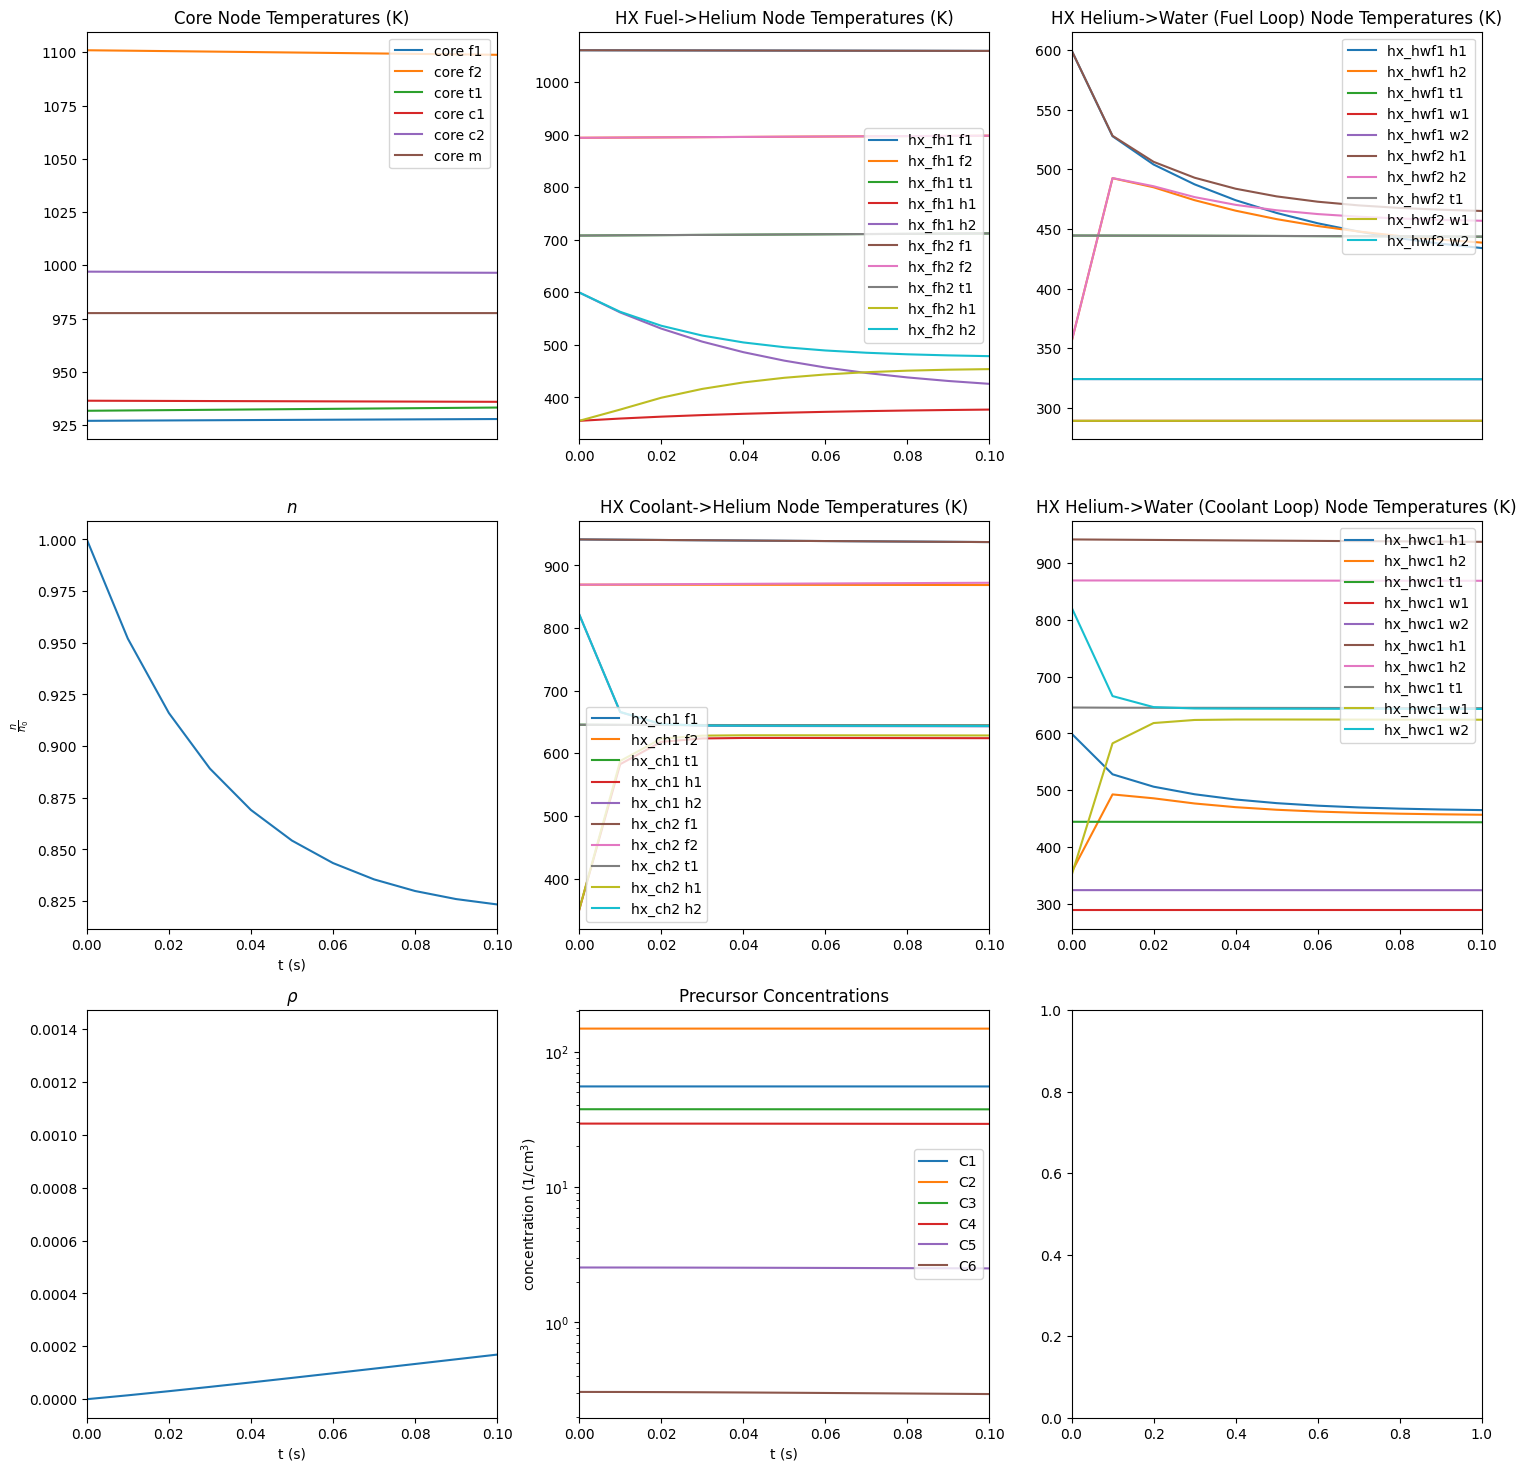

In [7]:
fig,axs = plt.subplots(3,3,figsize=(18,18))

t_0 = 0.0
t_f = 0.1


axs[0,0].set_xlim([t_0,t_f])
axs[0,0].plot(T,[s[0] for s in sol_jit],label="core f1") 
axs[0,0].plot(T,[s[1] for s in sol_jit],label="core f2") 
axs[0,0].plot(T,[s[2] for s in sol_jit],label="core t1")  
axs[0,0].plot(T,[s[3] for s in sol_jit],label="core c1")
axs[0,0].plot(T,[s[4] for s in sol_jit],label="core c2")
axs[0,0].plot(T,[s[5] for s in sol_jit],label="core m")
axs[0,0].legend()
axs[0,0].set_title("Core Node Temperatures (K)")
axs[0,0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


axs[0,1].set_xlim([t_0,t_f])
# axs[0,1].set_ylim([650,750])
axs[0,1].plot(T,[s[6] for s in sol_jit],label="hx_fh1 f1") 
axs[0,1].plot(T,[s[7] for s in sol_jit],label="hx_fh1 f2") 
axs[0,1].plot(T,[s[8] for s in sol_jit],label="hx_fh1 t1")  
axs[0,1].plot(T,[s[9] for s in sol_jit],label="hx_fh1 h1")
axs[0,1].plot(T,[s[10] for s in sol_jit],label="hx_fh1 h2")
axs[0,1].plot(T,[s[11] for s in sol_jit],label="hx_fh2 f1") 
axs[0,1].plot(T,[s[12] for s in sol_jit],label="hx_fh2 f2") 
axs[0,1].plot(T,[s[13] for s in sol_jit],label="hx_fh2 t1")  
axs[0,1].plot(T,[s[14] for s in sol_jit],label="hx_fh2 h1")
axs[0,1].plot(T,[s[15] for s in sol_jit],label="hx_fh2 h2")
axs[0,1].legend()
axs[0,1].set_title("HX Fuel->Helium Node Temperatures (K)")
#axs[0,1].tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off

# helium-water (fuel loop)
axs[0,2].set_xlim([t_0,t_f])
axs[0,2].plot(T,[s[16] for s in sol_jit],label="hx_hwf1 h1") 
axs[0,2].plot(T,[s[17] for s in sol_jit],label="hx_hwf1 h2") 
axs[0,2].plot(T,[s[18] for s in sol_jit],label="hx_hwf1 t1")  
axs[0,2].plot(T,[s[19] for s in sol_jit],label="hx_hwf1 w1")
axs[0,2].plot(T,[s[20] for s in sol_jit],label="hx_hwf1 w2")
axs[0,2].plot(T,[s[21] for s in sol_jit],label="hx_hwf2 h1") 
axs[0,2].plot(T,[s[22] for s in sol_jit],label="hx_hwf2 h2") 
axs[0,2].plot(T,[s[23] for s in sol_jit],label="hx_hwf2 t1")  
axs[0,2].plot(T,[s[24] for s in sol_jit],label="hx_hwf2 w1")
axs[0,2].plot(T,[s[25] for s in sol_jit],label="hx_hwf2 w2")
axs[0,2].legend()
axs[0,2].set_title("HX Helium->Water (Fuel Loop) Node Temperatures (K)")
axs[0,2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# coolant helium
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,[s[26] for s in sol_jit],label="hx_ch1 f1") 
axs[1,1].plot(T,[s[27] for s in sol_jit],label="hx_ch1 f2") 
axs[1,1].plot(T,[s[28] for s in sol_jit],label="hx_ch1 t1")  
axs[1,1].plot(T,[s[29] for s in sol_jit],label="hx_ch1 h1")
axs[1,1].plot(T,[s[30] for s in sol_jit],label="hx_ch1 h2")
axs[1,1].plot(T,[s[31] for s in sol_jit],label="hx_ch2 f1") 
axs[1,1].plot(T,[s[32] for s in sol_jit],label="hx_ch2 f2") 
axs[1,1].plot(T,[s[33] for s in sol_jit],label="hx_ch2 t1")  
axs[1,1].plot(T,[s[34] for s in sol_jit],label="hx_ch2 h1")
axs[1,1].plot(T,[s[35] for s in sol_jit],label="hx_ch2 h2")
axs[1,1].legend()
axs[1,1].set_title("HX Coolant->Helium Node Temperatures (K)")

# helium water (coolant loop)
axs[1,2].set_xlim([t_0,t_f])
axs[1,2].plot(T,[s[21] for s in sol_jit],label="hx_hwc1 h1") 
axs[1,2].plot(T,[s[22] for s in sol_jit],label="hx_hwc1 h2") 
axs[1,2].plot(T,[s[23] for s in sol_jit],label="hx_hwc1 t1")  
axs[1,2].plot(T,[s[24] for s in sol_jit],label="hx_hwc1 w1")
axs[1,2].plot(T,[s[25] for s in sol_jit],label="hx_hwc1 w2")
axs[1,2].plot(T,[s[26] for s in sol_jit],label="hx_hwc1 h1") 
axs[1,2].plot(T,[s[27] for s in sol_jit],label="hx_hwc1 h2") 
axs[1,2].plot(T,[s[28] for s in sol_jit],label="hx_hwc1 t1")  
axs[1,2].plot(T,[s[29] for s in sol_jit],label="hx_hwc1 w1")
axs[1,2].plot(T,[s[30] for s in sol_jit],label="hx_hwc1 w2")
axs[1,2].legend()
axs[1,2].set_title("HX Helium->Water (Coolant Loop) Node Temperatures (K)")

axs[1,0].plot(T,[s[46] for s in sol_jit],label="n") 
axs[1,0].set_xlabel("t (s)")
axs[1,0].set_title(r"$n$")
axs[1,0].set_ylabel(r"$\frac{n}{n_0}$")
axs[1,0].set_xlim([t_0,t_f])


axs[2,0].plot(T,[s[53] for s in sol_jit],label=r"$\rho$") 
axs[2,0].set_xlabel("t (s)")
axs[2,0].set_title(r"$\rho$")
axs[2,0].set_xlim([t_0,t_f])

axs[2,1].plot(T,[s[47] for s in sol_jit],label="C1") 
axs[2,1].plot(T,[s[48] for s in sol_jit],label="C2") 
axs[2,1].plot(T,[s[49] for s in sol_jit],label="C3")  
axs[2,1].plot(T,[s[50] for s in sol_jit],label="C4")
axs[2,1].plot(T,[s[51] for s in sol_jit],label="C5")
axs[2,1].plot(T,[s[52] for s in sol_jit],label="C6")
axs[2,1].legend()
axs[2,1].set_xlabel("t (s)")
axs[2,1].set_yscale("log")
axs[2,1].set_ylabel(r"concentration (1/cm$^3$)")
axs[2,1].legend(loc="right")
axs[2,1].set_title("Precursor Concentrations")
axs[2,1].set_xlim([t_0,t_f])

In [ ]:
# power generation from fission 

# core power generation
pow_f1 = [k_f1*P*s[26] for s in sol_jit]
pow_f2 = [k_f2*P*s[26] for s in sol_jit]
tot_pow = np.add(pow_f1,pow_f2)

# heat extracted by fuel-helium hx
fh_ex = [(s[1]-s[0])*W_f*scp_f for s in sol_jit]

# heat extracted by coolant-helium hx
ch_ex = [(s[4]-s[3])*W_c*scp_c for s in sol_jit]

# helium-> water (fuel loop)
hwf_ex = [(s[10]-s[9])*W_h_fh*scp_h for s in sol_jit]

# helium-> water (coolant loop)
hwc_ex = [(s[15]-s[14])*W_h_ch*scp_h for s in sol_jit]

tot_ex = [fh_ex[i]+ch_ex[i]+hwf_ex[i]+hwc_ex[i] for i in range(len(sol_jit))]

plt.plot(T,tot_pow,label="core power generation")
plt.plot(T,fh_ex,label="fh hx extraction")
plt.plot(T,ch_ex,label="ch hx extraction")
plt.plot(T,hwf_ex,label="hwf hx extraction")
plt.plot(T,hwc_ex,label="hwc hx extraction")
plt.plot(T,tot_ex,label="total extraction",linestyle="--")
plt.legend()


In [ ]:
rate_ex = np.divide(tot_ex,tot_pow)
plt.plot(T,rate_ex)
plt.ylim([0,1.2])